In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
# Parameter
xname = r"$w_0$"
xname_hat = r"$\hat{w}_0$"
xname_true = r"$w_{0, \mathrm{true}}$"
x_true = -1.
x_lim = 0.02

# Data 
x_hat = np.array([-9.996654e-01 , -1.002288e+00 , -1.001773e+00 , -1.001283e+00 , -9.947657e-01 , -9.979284e-01 , -9.991838e-01 , -1.000966e+00 , -1.000755e+00 , -1.004131e+00 , -9.933039e-01 , -9.997706e-01 , -9.995656e-01 , -1.004157e+00 , -9.977077e-01 , -1.002012e+00 , -9.949500e-01 , -1.000155e+00 , -1.000424e+00 , -9.996637e-01 , -9.996283e-01 , -9.946792e-01 , -9.998181e-01 , -9.983260e-01 , -9.969645e-01 , -1.005534e+00 , -1.002026e+00 , -1.002559e+00 , -9.955101e-01 , -1.000348e+00 , -1.005809e+00 , -9.932266e-01 , -1.003946e+00 , -1.000669e+00 , -1.000418e+00 , -1.002993e+00 , -9.997933e-01 , -1.004041e+00 , -9.990509e-01 , -9.989670e-01 , -1.005081e+00 , -9.960147e-01 , -1.000028e+00 , -9.981617e-01 , -9.970982e-01 , -1.000383e+00 , -9.994947e-01 , -1.005955e+00 , -1.004655e+00 , -9.965177e-01 , -1.006296e+00 , -1.000520e+00 , -9.949107e-01 , -1.001355e+00 , -1.001969e+00 , -1.001909e+00 , -1.003631e+00 , -9.997702e-01 , -9.984811e-01 , -1.005791e+00 , -1.002634e+00 , -9.968237e-01 , -1.000469e+00 , -1.003052e+00 , -9.964126e-01 , -1.002244e+00 , -9.997996e-01 , -9.986785e-01 , -1.003437e+00 , -9.994918e-01 , -9.959264e-01 , -9.985967e-01 , -9.980985e-01 , -1.001410e+00 , -1.000932e+00 , -9.985975e-01 , -9.984771e-01 , -1.003228e+00 , -1.005729e+00 , -9.979997e-01 , -9.976304e-01 , -9.990070e-01 , -9.939130e-01 , -1.000340e+00 , -1.003713e+00 , -1.000035e+00 , -1.004549e+00 , -9.983516e-01 , -9.997307e-01 , -1.003442e+00 , -1.001660e+00 , -9.976626e-01 , -9.938058e-01 , -9.999632e-01 , -1.003230e+00 , -9.962895e-01 , -9.982467e-01 , -9.986743e-01 , -9.955314e-01 , -9.948390e-01 , -9.990979e-01 , -1.002430e+00 , -9.960350e-01 , -9.978354e-01 , -1.004851e+00 , -9.989668e-01 , -9.992643e-01 , -9.982626e-01 , -9.897145e-01 , -1.000821e+00 , -1.001745e+00 , -9.973443e-01 , -1.002801e+00 , -1.001178e+00 , -1.004765e+00 , -1.000147e+00 , -1.005842e+00 , -9.993329e-01 , -9.979393e-01 , -9.998975e-01 , -1.002268e+00 , -9.961506e-01 , -9.957092e-01 , -9.951143e-01 , -1.002234e+00 , -1.001003e+00 , -9.996918e-01 , -1.001362e+00 , -1.001511e+00 , -1.000918e+00 , -1.000915e+00 , -1.002128e+00 , -9.965417e-01 , -9.992716e-01 , -9.988070e-01 , -9.995490e-01 , -1.001177e+00 , -9.974067e-01 , -9.979646e-01 , -9.986199e-01 , -9.987721e-01 , -1.000180e+00 , -1.000468e+00 , -1.004663e+00 , -9.990008e-01 , -1.005437e+00 , -1.002217e+00 , -1.003306e+00 , -9.999619e-01 , -9.978282e-01 , -9.947999e-01 , -1.002741e+00 , -9.966306e-01 , -1.000703e+00 , -1.002700e+00 , -1.001835e+00 , -1.003575e+00 , -9.972917e-01 , -9.963141e-01 , -1.000351e+00 , -1.000390e+00 , -1.003653e+00 , -9.999109e-01 , -9.966820e-01 , -9.974270e-01 , -9.989947e-01 , -9.977185e-01 , -9.982222e-01 , -9.979862e-01 , -1.001722e+00 , -1.004845e+00 , -1.004707e+00 , -1.004164e+00 , -1.001417e+00 , -1.008777e+00 , -1.006704e+00 , -1.001868e+00 , -9.980033e-01 , -9.988649e-01 , -1.002067e+00 , -1.003048e+00 , -1.004648e+00 , -1.001544e+00 , -1.002799e+00 , -9.980138e-01 , -1.000056e+00 , -1.003299e+00 , -1.000263e+00 , -1.000377e+00 , -1.005271e+00 , -1.005283e+00 , -1.003610e+00 , -9.976411e-01 , -1.004201e+00 , -1.002299e+00 , -1.000511e+00 , -1.002228e+00 , -1.002158e+00 , -1.002242e+00 , -9.957337e-01 , -1.010211e+00 , -1.000592e+00 , -9.981100e-01 , -9.968934e-01 , -1.004570e+00 , -9.999142e-01 , -9.990893e-01 , -1.001031e+00 , -1.000695e+00 , -9.989134e-01 , -9.990643e-01 , -1.000989e+00 , -1.003422e+00 , -9.973297e-01 , -9.993538e-01 , -9.992672e-01 , -9.965818e-01 , -9.999758e-01 , -9.986070e-01 , -1.000683e+00 , -1.002200e+00 , -1.001145e+00 , -9.944062e-01 , -9.990029e-01 , -9.996243e-01 , -1.002678e+00 , -9.977605e-01 , -9.969991e-01 , -1.004087e+00 , -9.990736e-01 , -1.003324e+00 , -9.986448e-01 , -9.973846e-01 , -1.003749e+00 , -1.005446e+00 , -1.001332e+00 , -9.946020e-01 , -1.005366e+00 , -9.968851e-01 , -1.000642e+00 , -1.002908e+00 , -1.004935e+00 , -9.985451e-01 , -9.997742e-01 , -9.955696e-01 , -1.001555e+00])
lnL_hat = -np.array([339.31, 302.81, 284.16, 348.48, 306.99, 298.15, 291.86, 303.38, 301.64, 333.81, 303.46, 331.27, 308.52, 335.13, 311.01, 327.37, 293.50, 282.84, 315.28, 300.48, 318.64, 301.02, 275.44, 324.33, 330.67, 338.50, 306.69, 300.81, 290.94, 301.95, 306.79, 305.18, 302.04, 281.85, 304.83, 300.50, 293.00, 285.17, 310.51, 317.55, 305.61, 321.66, 294.94, 300.19, 304.88, 307.17, 330.52, 310.83, 300.40, 309.24, 304.16, 331.73, 282.42, 284.78, 298.50, 304.53, 287.93, 298.13, 312.21, 314.07, 316.37, 307.38, 329.21, 302.23, 289.37, 309.57, 293.96, 287.81, 307.26, 286.71, 312.05, 295.87, 316.32, 312.86, 308.25, 315.23, 298.25, 290.01, 319.39, 270.62, 306.13, 269.23, 306.90, 293.95, 333.67, 323.31, 309.92, 282.76, 324.42, 299.51, 334.10, 321.35, 300.34, 295.50, 308.91, 297.91, 270.33, 300.48, 318.00, 293.57, 300.89, 296.60, 314.80, 317.52, 306.31, 298.81, 320.56, 337.10, 288.29, 292.40, 287.32, 294.80, 286.52, 307.08, 291.11, 296.26, 313.95, 309.14, 333.23, 290.87, 315.32, 275.29, 332.74, 298.21, 340.67, 298.53, 284.56, 300.03, 302.32, 329.94, 311.00, 294.40, 309.39, 262.82, 316.99, 296.97, 289.83,  311.26, 309.55, 304.40, 296.51, 304.04, 282.42, 310.51, 285.83, 291.54, 300.74, 310.80, 356.00, 308.36, 304.52,  260.43, 297.29, 301.17, 276.89, 297.34, 271.04, 304.28, 314.91, 308.41, 313.29, 344.61, 296.77, 283.98, 290.76, 310.72, 334.44, 276.43, 317.69, 313.00, 285.11, 272.24, 302.58, 321.13, 319.28, 320.39, 275.67, 329.61, 259.25, 305.83, 317.45, 299.92, 318.49, 290.65, 275.95, 300.78, 291.34, 332.64, 311.07, 324.66, 339.49, 297.41, 319.26, 323.84, 342.65, 298.42, 280.18, 280.07, 341.69, 291.70, 305.22, 327.01,  314.38, 296.49, 343.70, 267.48, 302.40, 310.28, 298.29, 308.15, 308.98, 308.58, 344.88, 304.45, 308.62, 300.14, 305.58, 285.51, 279.80, 306.80, 322.14, 315.71, 280.49, 315.29, 313.97, 309.95, 320.19, 300.61, 317.42, 311.94, 291.77, 307.20, 293.29,  321.63, 314.44, 311.38, 304.14, 296.12, 313.98, 292.15, 303.33, 298.11, 297.24, 315.70, 296.48, 321.48])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88,  311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94,  260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03,  314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64,  322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([-1.010, -1.008, -1.006, -1.004, -1.002, -1.0, -0.998, -0.996, -0.994, -0.992, -0.990])
chi2_asimov = 2*np.array([  5.06,   3.25,   1.83,   0.82,   0.21, 0.00,   0.21,   0.83,   1.87,   3.34,   5.23])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  11.67999999999995


In [3]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [4]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [5]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

minimum of parabola:  -1.0000596566763138
1 sigma:  0.0031179847224582224


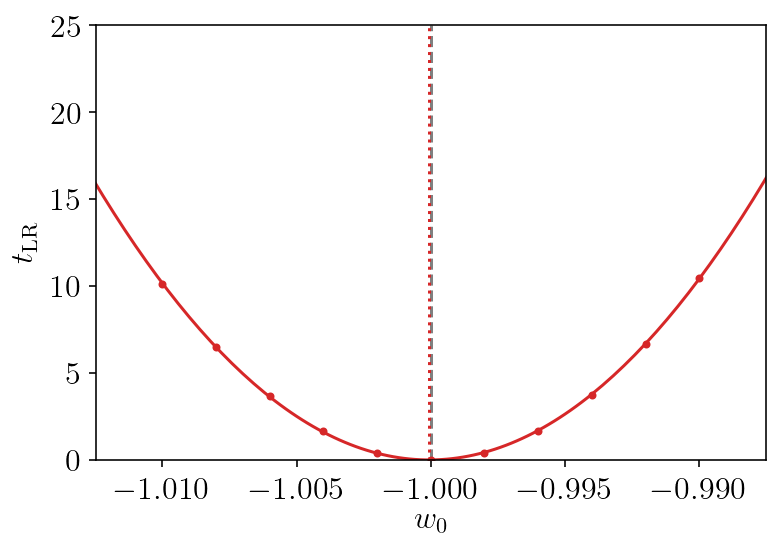

In [7]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("minimum of parabola: ", c)
zeros = fsolve(parabola, x0=[-2.,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Set x_lim
x_lim = 4*sigma_asimov

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="tab:red")
plt.plot(fit_x, fit_y, color='tab:red', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:red", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:red", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])
plt.show()

In [8]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

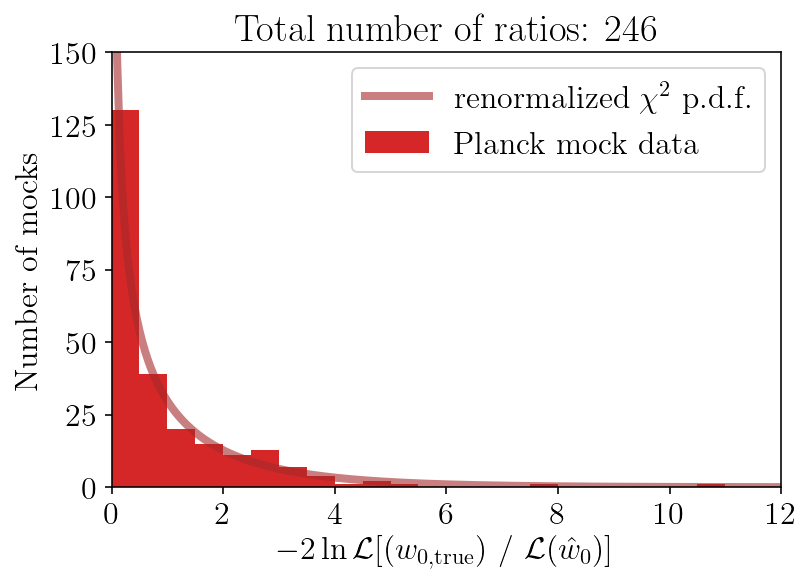

In [9]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="tab:red", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="brown", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln\mathcal{L}$[("+xname_true+r") / {$\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

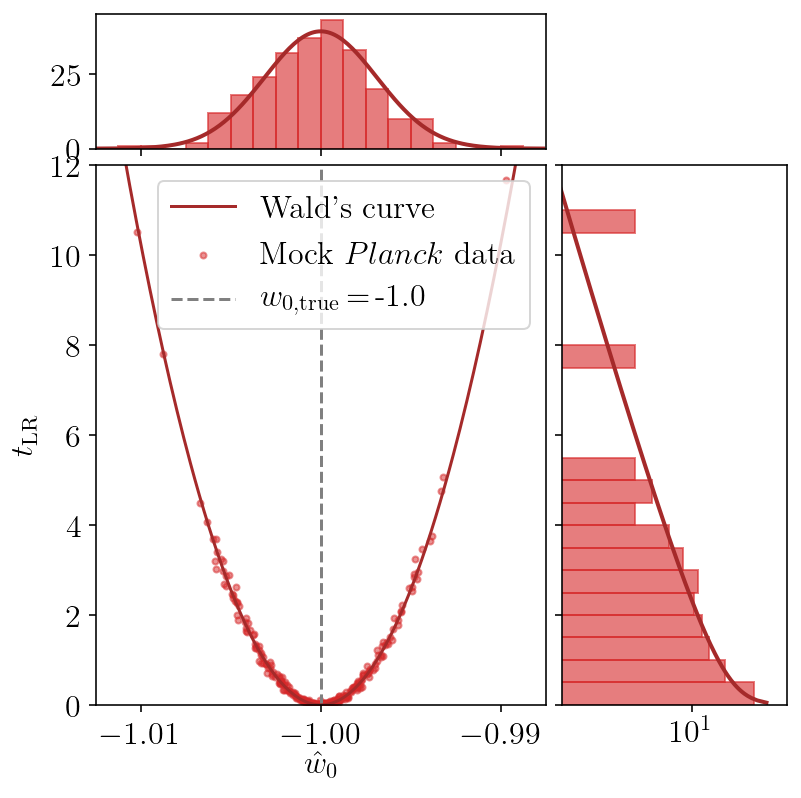

In [10]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="tab:red", marker=".", alpha=0.5, label=r"Mock ${Planck}$ data")
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='brown', ls='-', label="Wald's curve")
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$\, = \,$"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color='tab:red', alpha=0.6, edgecolor='tab:red')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='brown', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color='tab:red', alpha=0.6, edgecolor='tab:red')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='brown', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_w0.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [11]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 0.98
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

67.88617886178862 % of mocks below:  0.98


In [12]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.0031179847224582224
sigma_mocks:  0.003095749355517978
